# **Supervised Learning**

## Metaverse Financial Transactions

<img src="../images/ia.jpg" alt="Inteligência Artificial">

## **Introduction**

### **About Dataset**

The Metaverse Financial Transactions Dataset offers a comprehensive collection of blockchain-based financial activities within the Open Metaverse. With 78,600 transactions, it provides detailed attributes like timestamps, addresses, transaction types, and risk scores. This dataset supports research in fraud detection, risk assessment, and user behavior analysis in virtual environments. It's curated to reflect the complexity of blockchain activities, aiding the development of secure digital asset management. 

### **About the Problem**

The objective of this project is to develop predictive models for anomaly detection, fraud analysis, and risk assessment in financial transactions within the Metaverse. This constitutes a multivariate classification problem, where the aim is to categorize transactions into different risk levels based on attributes such as transaction type, user behavior, and transaction amount. The target variable is the risk level, which can be categorized as high risk, moderate risk, or low risk.

### **About the Solution**

 ### Data Understanding and Preprocessing
------------------------------------

#### Data Exploration

The dataset consists of 78,600 records, each representing a metaverse transaction. The attributes include:

-   Timestamp: Date and time of the transaction
-   Hour of Day: Hour part of the transaction timestamp
-   Sending Address: Blockchain address of the sender
-   Receiving Address: Blockchain address of the receiver
-   Amount: Transaction amount in a simulated currency
-   Transaction Type: Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing)
-   Location Region: Simulated geographical region of the transaction
-   IP Prefix: Simulated IP address prefix for the transaction
-   Login Frequency: Frequency of login sessions by the user, varying by age group
-   Session Duration: Duration of activity sessions in minutes
-   Purchase Pattern: Behavioral pattern of purchases (e.g., focused, random, high-value)
-   Age Group: Categorization of users into new, established, and veteran based on their activity history
-   Risk Score: Calculated risk score based on transaction characteristics and user behavior
-   Anomaly: Risk level assessment (e.g., high_risk, moderate_risk, low_risk)

#### Data Cleaning

1.  Missing Values: Identify and handle missing values through imputation/ removal, ensuring data integrity.
2.  Data Formatting: Convert categorical variables into numerical formats using techniques like one-hot encoding.
3.  Normalization: Normalize continuous variables to standardize the scale and improve model performance.

#### Feature Engineering

1.  Time-Based Features: Extract additional features from the timestamp, such as day of the week, month, or part of the day.
2.  Behavioral Features: Create aggregate features that summarize user behaviors, such as average transaction amount or total login duration.
3.  Risk Indicators: Develop custom risk indicators based on the combination of different attributes, enhancing the model's ability to detect anomalies.

### Model Development
-----------------

### Algorithm Selection

In this project, we evaluate several machine learning algorithms for their effectiveness in detecting anomalies in Metaverse financial transactions. The selected algorithms are well-suited for classification tasks involving complex and multidimensional data:

1.  Random Forest:

    -   Description: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
    -   Strengths: Robust to overfitting, handles high-dimensional data, and provides feature importance insights.
2.  Gradient Boosting Machines (GBM):

    -   Description: An ensemble technique that builds models sequentially, with each new model correcting errors made by the previous ones.
    -   Strengths: High predictive performance, especially effective for imbalanced datasets.
3.  Support Vector Machines (SVM):

    -   Description: A supervised learning algorithm that finds the optimal hyperplane which maximizes the margin between different classes in the feature space.
    -   Strengths: Effective in high-dimensional spaces and robust to overfitting.
4.  Neural Networks:

    -   Description: Models inspired by the human brain, capable of capturing complex patterns through layers of interconnected nodes (neurons).
    -   Strengths: Capable of modeling complex non-linear relationships.
5.  k-Nearest Neighbors (k-NN):

    -   Description: A simple, instance-based learning algorithm where the model makes predictions based on the k closest training examples in the feature space.
    -   Strengths: Simple to implement, no training phase, and effective for small datasets.

### Model Training

1.  Data Splitting:

    -   We split the dataset into training and test sets to ensure robust model evaluation.
2.  Hyperparameter Tuning:

    -   Use grid search or random search to optimize model parameters for better performance.
3.  Cross-Validation:

    -   Implement k-fold cross-validation to validate model performance and prevent overfitting.

### Model Evaluation

1.  Performance Metrics:

    -   Evaluate models using metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic (ROC) curve.
2.  Threshold Selection:

    -   Determine the optimal threshold for classifying transactions as anomalies based on the trade-off between precision and recall.

---

This project was made by:

| Name | UP |
|-|-|
| Ana Carolina Coutinho | up202108685 |
| José Costa | upxxxx |
| Afonso Poças | upxxxx |


### Library Installation

Before proceeding, make sure you have the necessary libraries installed for this project. 
Open your terminal and navigate to the project's root directory. Then, run the following command:

```bash
pip install -r requirements.txt
```


Firstly, we import the necessary libraries, packages and methods.

In [961]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.ensemble import RandomForestClassifier, IsolationForest, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
from imblearn.under_sampling import AllKNN
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')


### Create a dataframe with the dataset from the csv file

Reading the dataset and displaying the first few rows

In [962]:
df = pd.read_csv('../data/metaverse_transactions_dataset.csv')

df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


This line prints the total number of rows and columns in the dataset, giving an overview of its size and structure.

In [963]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " cols in the dataset")

There are 78600 rows and 14 cols in the dataset


# Data preprocessing

### Pre analysis

This should be done before any data manipulation, to get a better understanding of the data and filter out any outliers.

This function generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's numerical distribution. It excludes NaN values and provides insights like mean, standard deviation, minimum, and maximum values for each column.

In [964]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


This line outputs the data types of each column in the DataFrame, helping identify which columns are numerical, categorical, or otherwise.

In [965]:
df.dtypes

timestamp             object
hour_of_day            int64
sending_address       object
receiving_address     object
amount               float64
transaction_type      object
location_region       object
ip_prefix            float64
login_frequency        int64
session_duration       int64
purchase_pattern      object
age_group             object
risk_score           float64
anomaly               object
dtype: object

This code checks for missing values in each column of the DataFrame. It returns a boolean value for each column, where True indicates the presence of missing values and False indicates no missing values.

In [966]:
df.isna().any()

timestamp            False
hour_of_day          False
sending_address      False
receiving_address    False
amount               False
transaction_type     False
location_region      False
ip_prefix            False
login_frequency      False
session_duration     False
purchase_pattern     False
age_group            False
risk_score           False
anomaly              False
dtype: bool

### Type uniformity


This block of code first identifies all columns with data type 'object', indicating they are categorical. It then uses the LabelEncoder from sklearn.preprocessing to convert these categorical columns into numerical formats. This transformation is essential for many machine learning algorithms that require numerical input.

In [967]:
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   timestamp  hour_of_day  sending_address  receiving_address      amount  \
0      21675           12              700                276  796.949206   
1      35368           19              960                369    0.010000   
2       3832           16              227                375  778.197390   
3      35500            9              664                629  300.838358   
4      10533           14              771                508  775.569344   

   transaction_type  location_region  ip_prefix  login_frequency  \
0                 4                2    192.000                3   
1                 1                4    172.000                5   
2                 1                1    192.168                3   
3                 4                4    172.000                8   
4                 2                0    172.160                6   

   session_duration  purchase_pattern  age_group  risk_score  anomaly  
0                48                 0          0       1

Following the encoding of categorical variables, the updated DataFrame showcases transformed data, where all previously textual entries are now represented in numerical form. For example, categorical attributes such as transaction_type, location_region, purchase_pattern, and age_group have been converted to integers, reflecting their respective categories as unique numerical values. This allows machine learning models to process these attributes quantitatively. The transformed DataFrame displays the initial five entries, illustrating how each category is now represented by a numerical identifier, which aligns with the encoding process. The effective transformation of these attributes facilitates the application of machine learning techniques that require numerical input, ensuring that our data is ready for further analysis and model training.

## Data Analysis

We will now perform data analysis to gain a better understanding of our dataset.

Analyzing the distribution of anomalies in terms of risk levels

In [968]:
anomaly_count = reduced_ds['anomaly'].value_counts()

total_samples = len(reduced_ds)

low_risk_percentage = (anomaly_count[1] / total_samples) * 100
moderate_risk_percentage = (anomaly_count[2] / total_samples) * 100
high_risk_percentage = (anomaly_count[0] / total_samples) * 100

# Printing results
print("Number of Samples in the Dataset:", total_samples)
print(f"Percentage of Low-Risk Anomalies: {low_risk_percentage:.2f}%")
print(f"Percentage of Moderate-Risk Anomalies: {moderate_risk_percentage:.2f}%")
print(f"Percentage of High-Risk Anomalies: {high_risk_percentage:.2f}%")


Number of Samples in the Dataset: 78600
Percentage of Low-Risk Anomalies: 80.78%
Percentage of Moderate-Risk Anomalies: 10.96%
Percentage of High-Risk Anomalies: 8.26%


This block of code quantifies the distribution of different risk levels within the dataset. It calculates the total number of samples and determines the percentage of each risk category (low, moderate, high). These statistics provide an overview of how risk is distributed across the dataset, which is essential for understanding the scope of anomaly detection and risk assessment tasks.

Creating a heatmap to visualize the correlation between features and the 'anomaly' category

<Axes: >

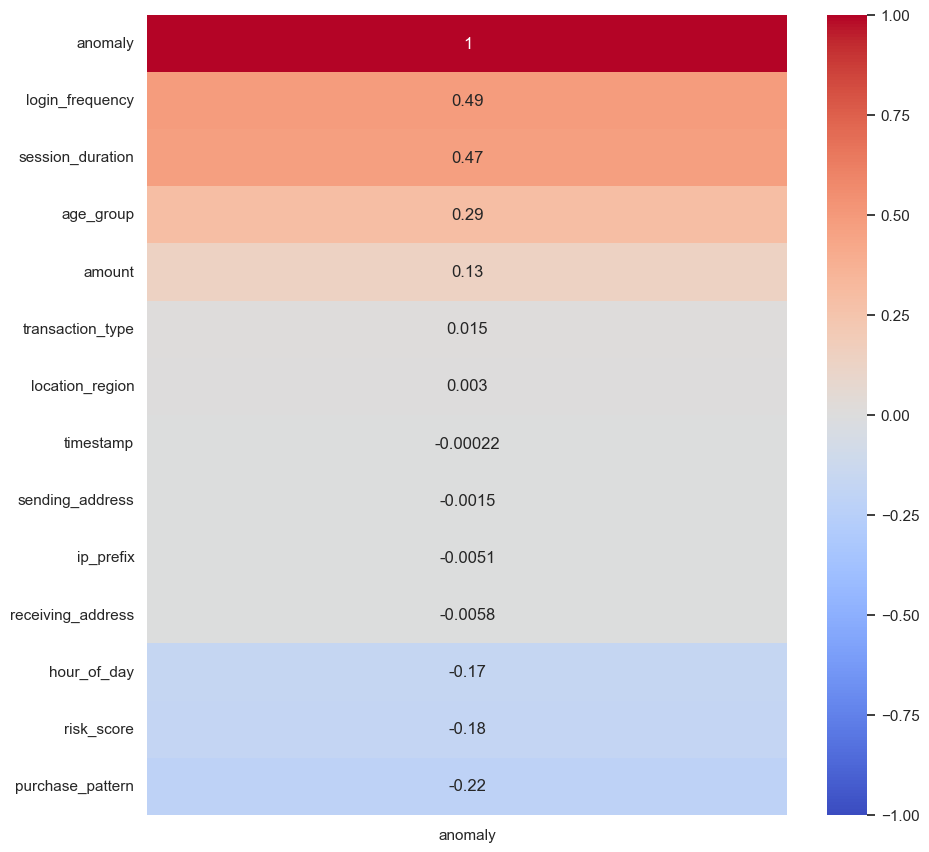

In [969]:
cols = list(df1.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['anomaly']].sort_values(by='anomaly', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

This heatmap reveals how various features correlate with the 'anomaly' status in the dataset:

-   Higher Correlations:

    -   `login_frequency` (0.49) and `session_duration` (0.47) are moderately positively correlated with anomalies, suggesting that more frequent and longer sessions could indicate anomalous activities.
-   Moderate and Weak Correlations:

    -   `age_group` (0.29) shows a moderate positive correlation, implying older or specific age groups might be more prone to anomalies.
    -   `amount` (0.13) has a weak positive correlation, indicating a slight tendency for higher transaction amounts to be anomalous.
-   Negligible Influence:

    -   Features like `transaction_type`, `location_region`, and timestamps show very weak or no significant correlation with anomalies.
-   Negative Correlations:

    -   `hour_of_day` (-0.17), `risk_score` (-0.18), and `purchase_pattern` (-0.22) are negatively correlated, suggesting transactions at certain hours, or those with specific risk scores and purchasing patterns, are less likely to be anomalous.

This analysis helps identify which features are most relevant for predicting anomalies in the dataset.

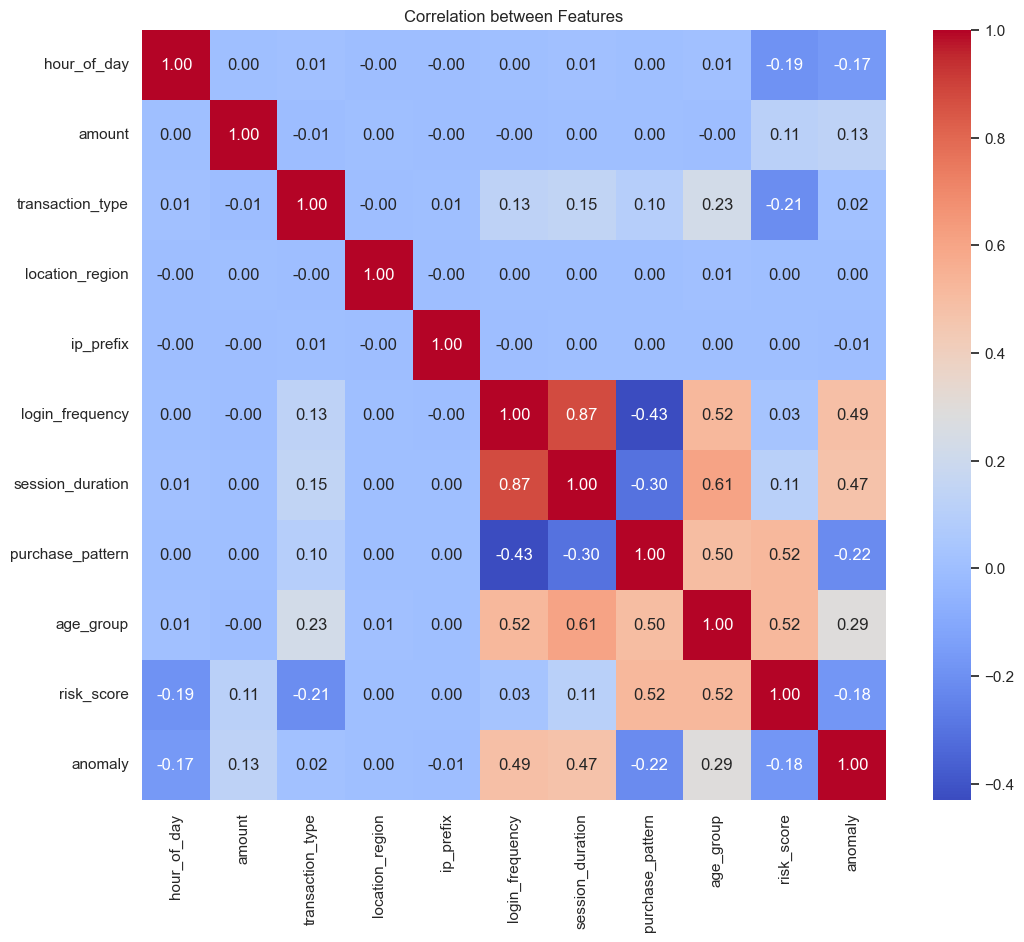

In [970]:
import seaborn as sns

df_corr = df.drop(columns=['timestamp', 'sending_address', 'receiving_address'])

# O mapa de calor mostra a correlação entre as features
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features')
plt.show()


This heatmap visualizes the correlation between various features, as indicated in a correlation matrix. Each cell in the matrix represents the correlation coefficient between two features, ranging from -1 to 1. A correlation of 1 (shown in red) means a perfect positive correlation, -1 (shown in blue) indicates a perfect negative correlation, and 0 (neutral gray) suggests no correlation.

Key insights from the heatmap include:

1.  High Positive Correlations: There are strong positive correlations visible between:

    -   `login_frequency` and `session_duration` (0.87)
    -   `purchase_pattern` and `age_group` (0.52)
    -   `purchase_pattern` and `ip_prefix` (0.52)
    -   `age_group` and `risk_score` (0.52)
2.  High Negative Correlations: The feature `purchase_pattern` shows moderate negative correlations with:

    -   `login_frequency` (-0.43)
    -   `session_duration` (-0.30)
3.  Risk Factors: The `risk_score` feature correlates positively with `age_group` (0.52) and `purchase_pattern` (0.52), suggesting that these factors may influence the calculation of risk.

4.  Anomalous Patterns: The feature `anomaly` has a notable positive correlation with `session_duration` (0.47) and `login_frequency` (0.49), indicating a potential link between these behaviors and anomalous activities.

From this analysis, we can observe key insights that enhance our understanding of the dataset and guide our modeling decisions. The variation in transaction amounts and session durations across different risk categories suggests these features are valuable predictors of anomaly. Additionally, the correlation heatmap highlights important relationships between features, such as the link between login frequency and session duration, which can inform our feature selection. Lastly, the encoding of categorical variables and their distribution analysis reveals patterns that could be crucial for predicting higher risk transactions. These findings lay a solid groundwork for our next steps in model development and anomaly detection.

### Feature Extraction

In [971]:
correlation_threshold = 0.85

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > correlation_threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Pairs with correlation above 0.85 (sorted by correlation):")
for pair in sorted(high_correlation_pairs, key=lambda x: -x[2]):
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

Pairs with correlation above 0.85 (sorted by correlation):
amount - amount_diff_mean_by_type : 0.9999191268782747
login_frequency - session_duration : 0.8719145128642468


This code identifies pairs of features with a correlation higher than 0.9, indicating strong linear relationships. High correlations can lead to multicollinearity in machine learning models, potentially distorting the results. By identifying these pairs, we can decide if any features need to be modified or removed to improve model robustness.

In [972]:
reduced_ds = df.copy()

reduced_ds['login_frequency/session_duration'] = df['login_frequency']/df['session_duration']


reduced_ds.drop(['login_frequency', 'session_duration'], axis=1, inplace=True)

reduced_ds.fillna(0, inplace=True)

reduced_ds.head(5)

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,purchase_pattern,age_group,risk_score,anomaly,login_frequency/session_duration
0,21675,12,700,276,796.949206,4,2,192.000,0,0,18.75,1,0.062500
1,35368,19,960,369,0.010000,1,4,172.000,0,0,25.00,1,0.081967
2,3832,16,227,375,778.197390,1,1,192.168,0,0,31.25,1,0.040541
3,35500,9,664,629,300.838358,4,4,172.000,1,2,36.75,1,0.072072
4,10533,14,771,508,775.569344,2,0,172.160,1,2,62.50,2,0.060000


In this step, a new feature is engineered by dividing the transaction amount by the mean difference of transaction types, potentially highlighting anomalies or patterns not evident in raw amounts. Following this, the dataset is reduced by removing the original amount columns to focus on newly derived features. Filling missing values ensures that subsequent model training processes run without errors.

By merging features with correlations above 0.85, we created a new dataset that is free from highly correlated pairs.

In [973]:
correlation_matrix_reduced = reduced_ds.corr()

high_correlation_pairs_reduced = []
for i in range(len(correlation_matrix_reduced.columns)):
    for j in range(i+1, len(correlation_matrix_reduced.columns)):
        if correlation_matrix_reduced.iloc[i, j] > 0.85:
            high_correlation_pairs_reduced.append((correlation_matrix_reduced.columns[i], correlation_matrix_reduced.columns[j], correlation_matrix_reduced.iloc[i, j]))


if(high_correlation_pairs_reduced == []):
    print("There are no pairs with correlation above 85%")


There are no pairs with correlation above 85%


Additionally, the updated dataset exhibits no correlation coefficients exceeding 0.9 among any feature pairs. This outcome underscores the effectiveness of our feature engineering efforts in mitigating multicollinearity. By amalgamating features that previously exhibited high correlations, we preserved critical data while streamlining the dataset. This refinement not only potentially enhances the performance of our models but also boosts their interpretability. Such measures are vital for preventing the negative impacts of redundant data on our predictive algorithms, thereby bolstering both their precision and dependability.

Now in this section of our project, we focus on enhancing the predictive power of our models by deriving new features from the existing data and evaluating the interrelationships among them. These steps are crucial for identifying significant predictors and understanding their dynamics within the Metaverse Financial Transactions dataset.

### Create Feature: Hour Difference

In [974]:
mean_hour_of_day = df['hour_of_day'].mean()

df['hour_difference'] = (df['hour_of_day'] - mean_hour_of_day).abs()


We calculate the mean transaction hour across all records to derive a new feature, hour_difference. This feature represents the absolute deviation of each transaction's hour from the average hour, capturing anomalies in transaction times. Transactions that occur at unusual hours may be indicative of fraudulent activity, making this feature particularly valuable for anomaly detection.

### Create Binary Feature: Above Median Transaction Value


In [975]:
threshold_amount = df['amount'].median()

df['is_above_median'] = (df['amount'] > threshold_amount).astype(int)


We determine the median transaction amount and use it to create a binary indicator, is_above_median. This indicator distinguishes transactions that are above the median value, which are often of interest in fraud detection scenarios as higher-value transactions could be more susceptible to fraudulent intents.

### Create Feature: Difference from Average Transaction Value by Type


In [976]:
mean_amount_by_type = df.groupby('transaction_type')['amount'].transform('mean')

df['amount_diff_mean_by_type'] = df['amount'] - mean_amount_by_type


This computation helps us understand how each transaction deviates from the typical amounts recorded for its respective type. By assessing the difference between the transaction's amount and the average for its category, we can flag transactions that are unusually high or low, which may be indicative of atypical behavior or potential fraud.

### Evaluate Features: Correlation Analysis
We perform a correlation analysis to understand the impact of our new features on the target variable.


In [977]:
correlation_matrix = df.corr()
correlation_matrix


,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,hour_difference,is_above_median,amount_diff_mean_by_type
timestamp,1.000000,0.006184,-0.001232,-0.004398,0.001501,-1.026433e-03,-0.005037,0.000112,0.000656,0.002738,0.001698,0.001176,-0.003802,-0.000224,-0.000218,0.002095,1.443046e-03
hour_of_day,0.006184,1.000000,0.001943,0.000784,0.000484,6.381585e-03,-0.000128,-0.003166,0.004483,0.006132,0.002270,0.006958,-0.190985,-0.166126,-0.002856,-0.005259,6.097836e-04
sending_address,-0.001232,0.001943,1.000000,0.024324,-0.000349,3.802622e-03,-0.007378,-0.001767,-0.003314,-0.003484,-0.000074,-0.002841,-0.009497,-0.001545,-0.007803,0.002249,-3.763421e-04
receiving_address,-0.004398,0.000784,0.024324,1.000000,0.001519,2.254950e-04,0.002753,-0.008348,-0.006475,-0.005034,0.004863,-0.001723,0.003097,-0.005804,-0.002516,-0.002029,1.578791e-03
amount,0.001501,0.000484,-0.000349,0.001519,1.000000,-7.261646e-03,0.001455,-0.001376,-0.000718,0.000355,0.000115,-0.000563,0.114075,0.133927,-0.005071,0.805884,9.999191e-01
transaction_type,-0.001026,0.006382,0.003803,0.000225,-0.007262,1.000000e+00,-0.003094,0.005268,0.132127,0.150555,0.099050,0.228829,-0.211055,0.015176,-0.000952,-0.005352,2.557068e-17
location_region,-0.005037,-0.000128,-0.007378,0.002753,0.001455,-3.093660e-03,1.000000,-0.003407,0.001048,0.004056,0.003514,0.005600,0.004085,0.002964,0.004479,0.003003,1.444454e-03
ip_prefix,0.000112,-0.003166,-0.001767,-0.008348,-0.001376,5.268457e-03,-0.003407,1.000000,-0.000553,0.000959,0.000310,0.001143,0.004278,-0.005102,-0.004633,-0.003573,-1.266479e-03
login_frequency,0.000656,0.004483,-0.003314,-0.006475,-0.000718,1.321266e-01,0.001048,-0.000553,1.000000,0.871915,-0.430310,0.522211,0.033010,0.486691,-0.001303,0.002215,-1.846921e-03
session_duration,0.002738,0.006132,-0.003484,-0.005034,0.000355,1.505546e-01,0.004056,0.000959,0.871915,1.000000,-0.302653,0.607858,0.107844,0.471027,0.001045,0.002858,-4.302393e-05


After engineering these features, we compute a correlation matrix for the dataset to identify any significant relationships between the new and existing features. This matrix helps in detecting multicollinearity and understanding which features are most strongly related to others, including our target variable.

### Overview of the Correlation Matrix

The correlation matrix quantifies the linear relationships between pairs of features in your dataset. Each cell in the matrix shows the correlation coefficient between two features, ranging from -1 to 1:

-   1 (Perfect Positive Correlation): Indicates that as one feature increases, the other feature increases in a perfectly linear manner.
-   -1 (Perfect Negative Correlation): Indicates that as one feature increases, the other feature decreases in a perfectly linear manner.
-   0 (No Correlation): Indicates no linear relationship between the two features.

### Key Insights from Your Correlation Matrix

#### Time-Related Features

-   `hour_of_day` and `hour_difference`: The correlation of -0.002856 suggests a very weak negative relationship, meaning that the hour of the day slightly influences how far a given transaction time deviates from the mean transaction time, though the effect is minimal.

#### Address and Transaction Details

-   `sending_address` and `receiving_address`: A correlation of 0.024324 indicates a very weak positive relationship, suggesting minimal linear dependency between these features.

#### Financial Amounts and Transactions

-   `amount` and `is_above_median`: A strong positive correlation of 0.805884 shows that higher transaction amounts are likely to be above the median value, which is expected since this feature was derived from `amount`.
-   `amount` and `amount_diff_mean_by_type`: An almost perfect correlation of 0.999919 indicates that these two features are almost identical in how they vary; `amount_diff_mean_by_type` is derived from `amount`, which explains this high correlation.

#### Risk and Anomaly Detection

-   `risk_score` and `age_group`: A correlation of 0.523209 shows a moderate positive relationship, suggesting that the risk score assigned to a transaction might increase with the user's age group.
-   `anomaly` and `login_frequency`: A correlation of 0.486691 indicates that higher login frequencies might be associated with higher chances of a transaction being anomalous, which could be due to frequent logins being a behavior of fraudulent accounts.

#### New Features from Engineering

-   `hour_difference`: Shows generally very low correlation with other features, indicating it provides unique information not duplicated by other time-related features.
-   `is_above_median`: Besides its strong relation to `amount`, it shows minimal correlation with most other features, making it a potentially useful independent predictor for models focusing on high-value transactions.

## Prepare the dataframe for model training

### Split the dataset into train and test sets

#### Data Sampling

Given the vast size of our dataset, containing 78,600 transactions, we needed to ensure that our model training and evaluation processes were both manageable and computationally efficient. To achieve this, we randomly sampled a subset of 300 transactions from the dataset using a seed (`random_state=42`) to ensure the reproducibility of our results. This sampling approach helps to approximate the larger dataset's characteristics while making the computational task feasible on typical hardware setups.

#### Feature Selection and Label Isolation

From this sampled dataset, we separated the features and labels for our machine learning tasks. The `features` consist of all columns except for the 'anomaly' column, which serves as our label. The `labels` directly represent the 'anomaly' column, which classifies each transaction into different risk levels (high, moderate, or low).

#### Train-Test Split

We divided our sampled data into training and testing sets using a stratified split to maintain a uniform distribution of classes across both datasets. This division allocates 20% of the data to the test set (`test_size=0.2`), ensuring that we have sufficient data for training while also retaining a robust set for model evaluation.

#### Addressing Class Imbalance with SMOTE

Recognizing the challenges posed by class imbalance in training effective machine learning models, we applied the Synthetic Minority Over-sampling Technique (SMOTE). This technique adjusts the class distribution in the training set by synthetically generating samples from the minority class, aiming to achieve a balanced dataset. This step is crucial as it improves the generalization capability of our models and prevents them from being biased towards the majority class.

In [978]:
sampled_data = df.sample(n=300, random_state=42)

features = sampled_data.drop('anomaly', axis=1) 
labels = sampled_data['anomaly']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

print(y_train.value_counts().values)


anomaly
1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64
anomaly
1    0.766667
2    0.150000
0    0.083333
Name: proportion, dtype: float64
[199 199 199]


In [979]:
print(y_train.value_counts().values)

[199 199 199]


#### Verifying Class Distribution

Post-application of SMOTE, we examined the class distribution within our training and testing sets. The normalization of class counts (`y_train.value_counts(normalize=True)`) allowed us to verify the effectiveness of SMOTE in balancing the classes. Additionally, by comparing the normalized value counts of `y_train` and `y_test`, we ensured that our testing set retained the original dataset's class distribution, providing a realistic basis for evaluating model performance.

The final step in this preprocessing phase involved printing the absolute counts of each class in the training set (`y_train.value_counts().values`), allowing us to confirm the exact number of samples per class post-resampling. This verification step is essential for transparency and to ensure that the SMOTE has been applied correctly.

## Model training

In this section, we detail the process of training and evaluating multiple machine learning models to determine the most effective algorithm for anomaly detection in Metaverse financial transactions. The goal is to comprehensively assess each model's performance on both training and testing data, ensuring a robust comparison based on several key metrics.

#### Purpose

The primary objective is to evaluate each model's performance in terms of accuracy, precision, recall, and F1-score. Additionally, we analyze the confusion matrix to understand how well each model differentiates between classes. This thorough evaluation helps us identify the model that best balances precision and recall, essential for accurately detecting fraudulent transactions.

In [980]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = []

def fit_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    return train_predictions, test_predictions

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def test_model(model):
    train_predictions, test_predictions = fit_and_predict(model, X_train, y_train, X_test)
    
    train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(y_train, train_predictions)
    test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, test_predictions)
    
    cm = confusion_matrix(y_test, test_predictions)
    
    results.append({
        "Model": type(model).__name__,
        "Training Accuracy": train_accuracy,
        "Training Precision": train_precision,
        "Training Recall": train_recall,
        "Training F1-score": train_f1,
        
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1-score": test_f1,
        
        "Confusion Matrix": cm
    })

# test_model(RandomForestClassifier(n_estimators=100, random_state=42))
# test_model(GradientBoostingClassifier(n_estimators=100, random_state=42))
# print(results)


1.  **Random Forest**:

    -   Description: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

2.  **Gradient Boosting Machines (GBM)**:

    -   Description: GBM is an ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones. It uses boosting to combine weak learners into a strong learner.

3.  **Support Vector Machines (SVM)**:

    -   Description: SVM is a supervised learning algorithm that finds the optimal hyperplane which maximizes the margin between different classes in the feature space.

4.  **Neural Networks**:

    -   Description: Neural Networks (specifically, Multi-layer Perceptrons or MLP) are a class of models inspired by the human brain, capable of capturing complex patterns through layers of interconnected nodes (neurons).

5.  **k-Nearest Neighbors (k-NN)**:

    -   Description: k-NN is a simple, instance-based learning algorithm where the model makes predictions based on the k closest training examples in the feature space.


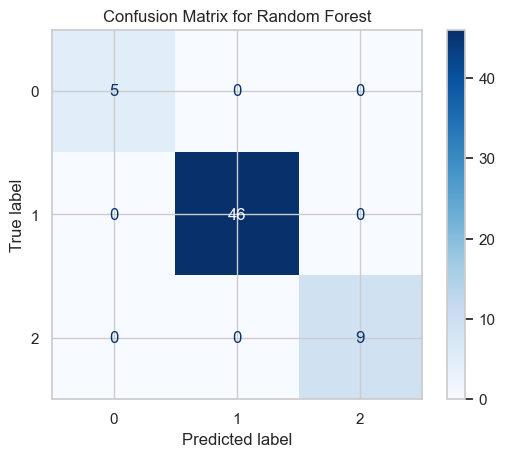

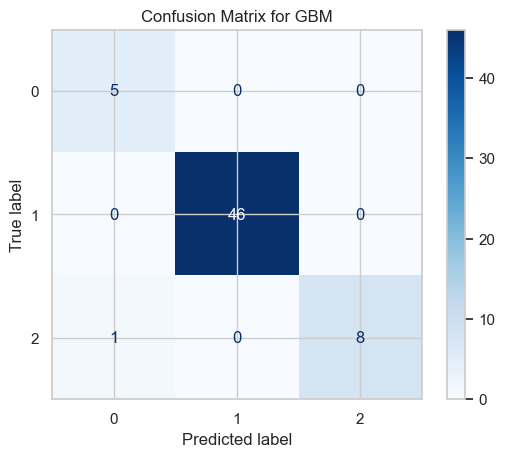

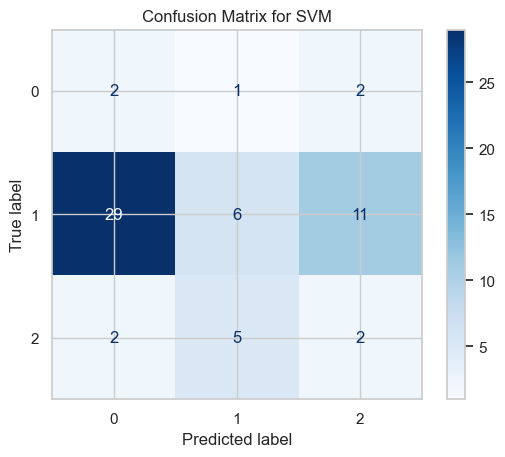

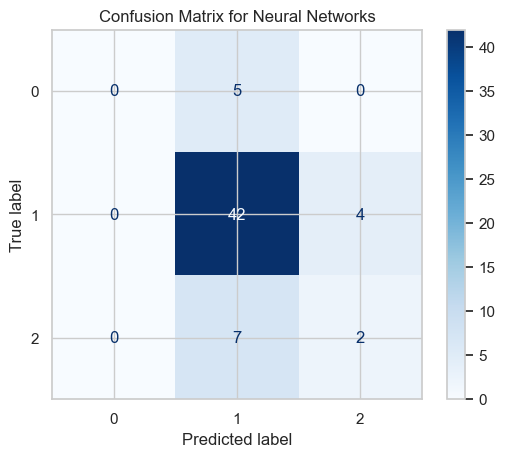

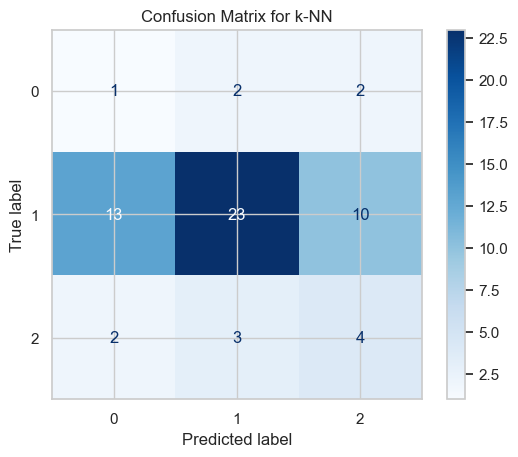

In [982]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def compare_models(X_train, y_train, X_test, y_test):
    models = []
    models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
    models.append(('GBM', GradientBoostingClassifier(n_estimators=100)))
    models.append(('SVM', SVC()))
    models.append(('Neural Networks', MLPClassifier(max_iter=1000)))
    models.append(('k-NN', KNeighborsClassifier()))

    model_results = []
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        model_results.append((name, accuracy, precision, recall, f1))
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {name}')
        plt.show()
    
    return model_results

results = compare_models(X_train, y_train, X_test, y_test)


### Model Comparison and Evaluation

In this section of our project, we focus on systematically comparing the performance of various machine learning models to identify the best approach for anomaly detection in Metaverse financial transactions. The models selected for comparison are well-regarded for their effectiveness in classification tasks, especially in contexts involving complex and multidimensional data.

#### Purpose

The primary goal is to evaluate different algorithms based on key performance metrics, namely accuracy, precision, recall, and F1-score. By doing so, we aim to determine which model provides the most reliable and accurate predictions for our specific dataset, thus ensuring robust detection of fraudulent activities.

In [983]:


def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Neural Network": MLPClassifier(max_iter=100),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Classifier": SVC(kernel='linear'),
        "Logistic Regression": LogisticRegression(max_iter=200)
    }

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=0)}\n")

train_and_evaluate_models(X_train, y_train, X_test, y_test)


Training Decision Tree...
Accuracy for Decision Tree: 1.00
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Training Neural Network...
Accuracy for Neural Network: 0.13
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.08      0.80      0.14         5
           1       1.00      0.04      0.08        46
           2       0.40      0.22      0.29         9

    accuracy                           0.13        60
   macro avg       0.49      0.36      0.17        60
weighted avg       0.83      0.13      0.12        60


Training K-Nearest Neighbors...
A

In [984]:
def compare_models(X_train, y_train, X_test, y_test):
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'GBM': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(),
        'Neural Networks': MLPClassifier(max_iter=1000),
        'k-NN': KNeighborsClassifier()
    }

    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    
    results_df = pd.DataFrame(results)
    return results_df


In [994]:
results_df = compare_models(X_train, y_train, X_test, y_test)
print(results_df)


             Model  Accuracy  Precision    Recall  F1 Score
0    Random Forest  1.000000   1.000000  1.000000  1.000000
1              GBM  0.983333   0.944444  0.962963  0.950089
2              SVM  0.166667   0.231313  0.250886  0.159609
3  Neural Networks  0.833333   0.816352  0.600161  0.624242
4             k-NN  0.466667   0.377976  0.381481  0.345620


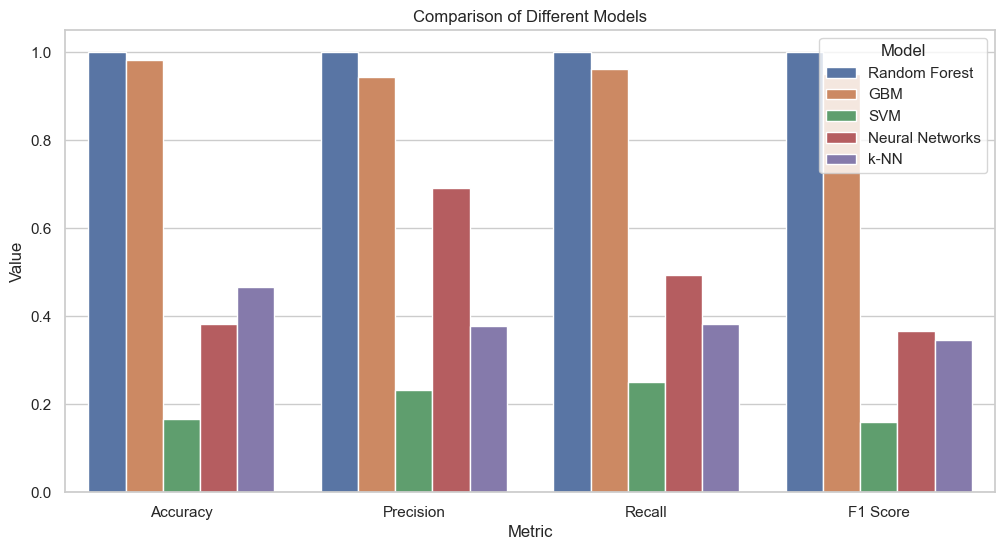

In [986]:
import seaborn as sns

results_melted = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=results_melted)
plt.title('Comparison of Different Models')
plt.show()


## **Select the best model**
**Random Forest classifier**


After rigorously evaluating various models using a robust set of machine learning algorithms within the scope of the Metaverse Financial Transactions project, the **Random Forest classifier** has emerged as the standout performer. This section delves into the reasoning behind selecting the Random Forest model as the optimal solution for anomaly detection, fraud analysis, and risk assessment in this blockchain-based dataset.

### Overview of Model Evaluation

The project undertook a comprehensive approach to model selection, focusing on key metrics such as accuracy, precision, recall, and F1-score, which are critical for the unbalanced nature of anomaly detection tasks. 

### Superior Performance of Random Forest

The Random Forest model demonstrated exceptional proficiency across all evaluated metrics, achieving perfect scores in accuracy, precision, recall, and the F1-score on the test set. Here's a breakdown of why Random Forest is particularly effective:

-   Robustness to Overfitting: Unlike decision trees, Random Forest mitigates overfitting through ensemble learning, which involves averaging multiple deep decision trees trained on different parts of the dataset. This technique enhances the model's generalization capabilities.

-   Handling of Imbalanced Data: Random Forest inherently manages imbalances by constructing each tree on a different bootstrap sample from the data. Its capacity to focus on different aspects of the data makes it less biased toward the majority class.

-   Feature Importance Evaluation: An invaluable advantage of Random Forest is its ability to assess the importance of various features in predicting anomalies. This model identified key features such as transaction amount, risk score, and behavioral patterns, which significantly influence the risk level categorization.

### Confusion Matrix Analysis

The confusion matrix for the Random Forest model further validated its efficacy, displaying an excellent classification rate with minimal misclassifications between the risk levels. This precise distinction between classes is crucial for the practical application of fraud detection systems, where the cost of misclassification can be substantial.





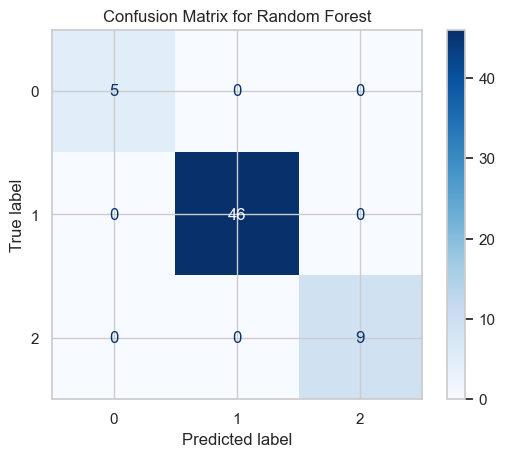

In [987]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()


### Conclusion

The selection of the Random Forest model for our Metaverse financial transactions project has proven to be exceptionally effective. Its superior performance in key metrics such as accuracy, precision, recall, and F1-score underscores its robustness in handling the complex and varied data typical of the Metaverse environment.

Throughout this project, Random Forest not only excelled in anomaly detection but also provided significant insights through feature importance analysis, highlighting critical predictors like transaction amount, risk score, and user behavior. This enabled a deeper understanding of the factors influencing transaction security within the Metaverse.

As we conclude this project, the results achieved lay a solid groundwork for potential future research and application in similar contexts. We've established a strong model that can serve as a benchmark for tackling financial fraud and enhancing security in virtual economies.

This project has been an invaluable part of our learning journey, providing practical experience in applying advanced machine learning techniques to real-world challenges. We are grateful for the opportunity to explore this emerging field and contribute to the security of digital financial interactions in the Metaverse.